<a href="https://colab.research.google.com/github/IT21174230/ML-Journey/blob/main/MLP_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset='/content/weather.txt'

import pandas as pd
import numpy as np

dataframe=pd.read_csv('weather.txt', delimiter=',')


In [ ]:
X=dataframe.drop(columns=['S.No','date','Occupancy'])
y=dataframe['Occupancy']

print(X.shape)
print(y.shape)
print(X.dtypes)

X=X.to_numpy()
y=y.to_numpy()

(8143, 5)
(8143,)
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
dtype: object


In [ ]:
print(X)
print(y)

[[2.31800000e+01 2.72720000e+01 4.26000000e+02 7.21250000e+02
  4.79298818e-03]
 [2.31500000e+01 2.72675000e+01 4.29500000e+02 7.14000000e+02
  4.78344095e-03]
 [2.31500000e+01 2.72450000e+01 4.26000000e+02 7.13500000e+02
  4.77946352e-03]
 ...
 [2.11000000e+01 3.60950000e+01 4.33000000e+02 7.98500000e+02
  5.59563902e-03]
 [2.11000000e+01 3.62600000e+01 4.33000000e+02 8.20333333e+02
  5.62144937e-03]
 [2.11000000e+01 3.62000000e+01 4.47000000e+02 8.21000000e+02
  5.61206354e-03]]
[1 1 1 ... 1 1 1]


In [ ]:
#rescale for performance
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler(feature_range=(0,1))
X=scalar.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(6107, 5)
(2036, 5)
(6107,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
   Dense(64, activation='relu', input_shape=(5,)),
   Dense(32, activation='relu'),
   Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.engine.training import optimizer
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    X_train, y_train, epochs=100, validation_data=(X_test, y_test)
)

Epoch 1/100
191/191 [==============================] - 1s 3ms/step - loss: 0.0199 - accuracy: 0.9923 - val_loss: 0.0251 - val_accuracy: 0.9892
Epoch 2/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9923 - val_loss: 0.0250 - val_accuracy: 0.9892
Epoch 3/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9923 - val_loss: 0.0249 - val_accuracy: 0.9897
Epoch 4/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9925 - val_loss: 0.0247 - val_accuracy: 0.9912
Epoch 5/100
191/191 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9923 - val_loss: 0.0246 - val_accuracy: 0.9912
Epoch 6/100
191/191 [==============================] - 1s 3ms/step - loss: 0.0195 - accuracy: 0.9931 - val_loss: 0.0246 - val_accuracy: 0.9912
Epoch 7/100
191/191 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9930 - val_loss: 0.0245 - val_accuracy: 0.9912

In [ ]:
test_loss, test_accuracy=model.evaluate(X_test, y_test)

print(f"Test Loss:{test_loss}\nTest Accuracy:{test_accuracy}")

64/64 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9907
Test Loss:0.02567894756793976
Test Accuracy:0.990667998790741


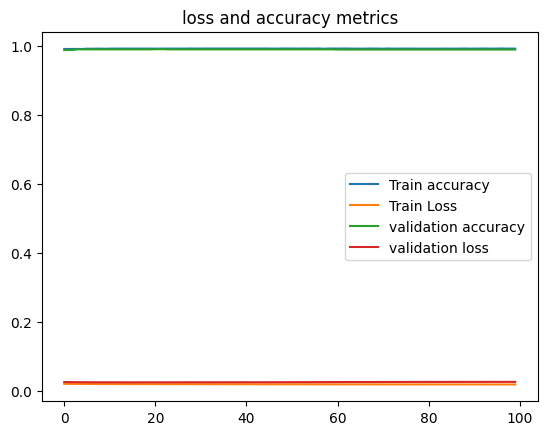

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

print(history)

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('loss and accuracy metrics')
plt.show()
plt.savefig('metrics')